In [1]:
'''
1. Реализуйте алгоритм (а) градиентного спуска и (б) стохастического градиентного спуска для решения
задачи нахождения минимума (максимума) для выбранной дифференцируемой функции двух переменных.
2. Визуализируйте на графике схождение алгоритмов (а) и (б) к точке экстремума, воспользовавшись, 
например, функцией contour_plot() из ноутбука "Optimization_methods.ipynb".
3. С помощью фреймворка keras реализуйте полносвязую нейронную сеть с одним скрытым слоем для
решения задачи классификации на датасете bioresponse.csv из Лабораторной работы №2, применив алгоритм оптимизации "Adam".
'''

'\n1. Реализуйте алгоритм (а) градиентного спуска и (б) стохастического градиентного спуска для решения\nзадачи нахождения минимума (максимума) для выбранной дифференцируемой функции двух переменных.\n2. Визуализируйте на графике схождение алгоритмов (а) и (б) к точке экстремума, воспользовавшись, \nнапример, функцией contour_plot() из ноутбука "Optimization_methods.ipynb".\n3. С помощью фреймворка keras реализуйте полносвязую нейронную сеть с одним скрытым слоем для\nрешения задачи классификации на датасете bioresponse.csv из Лабораторной работы №2, применив алгоритм оптимизации "Adam".\n'

In [2]:
def func(x, y):
    return (x**2 + y**2 - 1)*3 - x**2*y**3

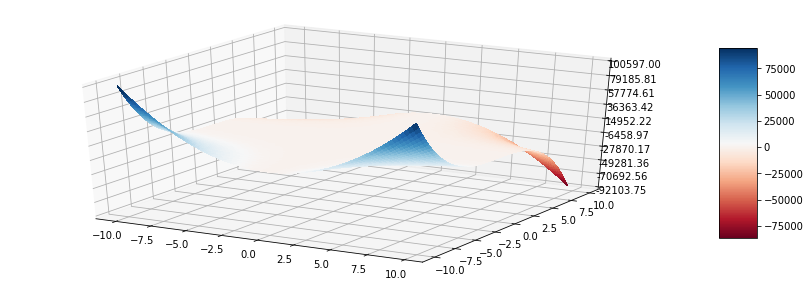

In [3]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#plot function
x = np.arange(-10, 10, 0.25)
y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(x, y)
Z = func(X,Y)

fig = plt.figure(1, figsize = (15, 5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

In [4]:
def gradient(x, y):
    return np.array([2*x, 4*y])

def grad_descent_mult(df,x_prev,learn_rate):
    
    epsilon = 0.001
    grad_itter = 1
    
    seq_x = []
    seq_y = []

    x_next = np.subtract(x_prev, learn_rate*gradient(x_prev[0],x_prev[1]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        x_prev = x_next
        x_next = x_prev - learn_rate*gradient(x_prev[0],x_prev[1])
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, seq_x, seq_y)

def stochastic_grad_descent_mult(df,x_prev,learn_rate):
    
    epsilon = 0.001
    grad_itter = 1
    
    seq_x = []
    seq_y = []

    x_next = np.subtract(x_prev, learn_rate*gradient(x_prev[0],x_prev[1]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        i = np.random.randint(0, len(x_prev))
        x_next = x_prev[i] - learn_rate*gradient(x_prev[0],x_prev[1])
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, seq_x, seq_y)

Minimum (x,y) from gradient descent: [1.01559957e-03 2.62144000e-12]
Number of gradient descent iterations: 17


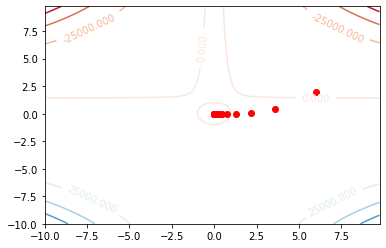

In [5]:
def contour_plot(x_seq,y_seq, x1):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

grad_output = grad_descent_mult(gradient, np.array([6,2]), 0.2)

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])

contour_plot(grad_output[2],grad_output[3], np.array([6,2])) 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('bioresponse.csv')
data.head()

Using TensorFlow backend.


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import matplotlib.pyplot as plt

X = data.drop('Activity', axis=1)
y = data.Activity


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
model = Sequential()
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1)
print(hist.history)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

fig, axs = plt.subplots(figsize = (8, 4))
axs.plot(history.history['val_loss'], label='val_loss')
axs.plot(history.history['loss'] , label='loss')
axs.set_xlabel("Epochs")
axs.set_ylabel("Loss")
axs.legend(shadow=True, loc=1)

plt.show()

Train on 2625 samples, validate on 1126 samples
2400/2625 [==========================>...] - ETA: 0s - loss: 9.1452 - accuracy: 0.2658